In [170]:
import numpy as np
import matplotlib.pyplot as plt

In [171]:
#Generating sample data
x= np.linspace(1,10,10) # x is an array of 10 equally spaced values between 0 and 10
y = np.sin(x)
print(x)
len(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


10

In [184]:
#Define the terms
num_control_points= len(x)
degree= 1
order= 2
n= num_control_points -1

In [191]:
def find_knots(n, degree):
    num_knots = n + order +1
    knots = np.zeros(num_knots)
    # Generate a knot vector with open ends
    for i in range(num_knots):
        if i<order:
            knots[i] = 0
        elif order<= i<=n:
            knots[i]=i-order+1
        elif i>n:
            knots[i]=n-order+2

    return knots

t = find_knots(len(x)-1,degree)
print(t)


[0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 9.]


In [192]:
def bspline_basis(t, i, k, knots):
    if k == 0:
        if knots[i] <= t < knots[i+1]:
            return 1
        else:
            return 0
    else:
        w1 = 0 if knots[i+k] == knots[i] else (t - knots[i]) / (knots[i+k] - knots[i])
        w2 = 0 if knots[i+k+1] == knots[i+1] else (knots[i+k+1] - t) / (knots[i+k+1] - knots[i+1])
        return w1 * bspline_basis(t, i, k-1, knots) + w2 * bspline_basis(t, i+1, k-1, knots)

In [193]:
#Evaluate the BSpline basis functions
x_interpolated = np.linspace(x[0],x[-1],10)
y_interpolated = np.zeros_like(x_interpolated)
for i, x_val in enumerate(x_interpolated):
    for j in range(len(x)):
        y_interpolated[i] += y[j]* bspline_basis(x_val,j,degree,t)
print(y_interpolated)

[ 0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155   0.6569866
  0.98935825  0.41211849  0.          0.        ]


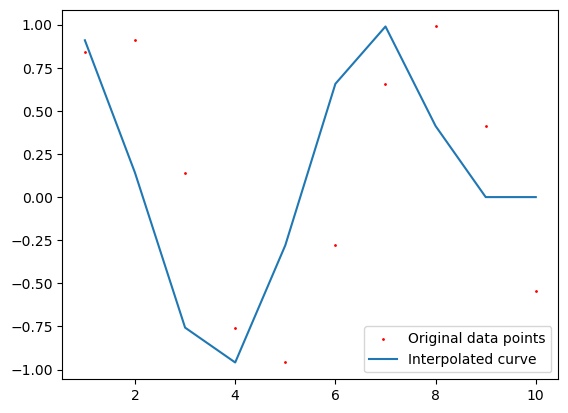

In [194]:
#plot the original data and the interpolated curve
plt.scatter(x,y,1,"red", label="Original data points")
plt.plot(x_interpolated, y_interpolated, label="Interpolated curve")
plt.legend()
plt.show()
